In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib
import datetime

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

In [3]:
# Load up the scanned 3D plot
X = PlyData.read('Datasets/stanford_armadillo.ply')

In [4]:
# format as dataframe & reduce the No. of grids
reduce_factor = 50
Y = pd.DataFrame({
  'x':X['vertex']['z'][::reduce_factor],
  'y':X['vertex']['x'][::reduce_factor],
  'z':X['vertex']['y'][::reduce_factor]
})

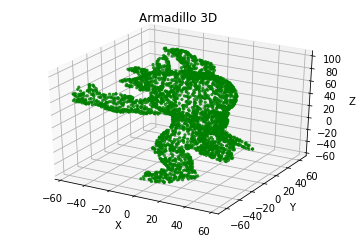

In [5]:
# Render the Original Armadillo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(Y.x, Y.y, Y.z, c='green', marker='.', alpha=0.75)
plt.show()

In [6]:
# subroutine for PCA
def do_PCA(X, nD):
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components = nD, svd_solver = 'full')
    pca.fit(X)
    PCA(copy = True, n_components = nD, whiten = False)
    Y = pca.transform(X)
    
    return Y

In [23]:
# PCA and time it
t1 = datetime.datetime.now()
for i in range(5000): Y2 = do_PCA(Y,2)
dt = datetime.datetime.now() - t1
print(dt)

0:00:02.292364


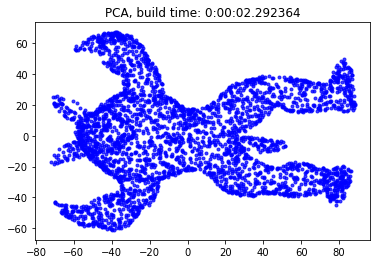

In [24]:
# Render the newly transformed PCA armadillo!
if Y2 is not None:
    plt.scatter(Y2[:,0], Y2[:,1], c='blue', marker='.', alpha=0.75)
    plt.title('PCA, build time: ' + str(dt))
    plt.show()

In [18]:
# subroutine for Randomized PCA
def do_RandomizedPCA(X, nD):
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components = nD, svd_solver = 'randomized')
    pca.fit(X)
    PCA(copy = True, n_components = nD, whiten = False)
    Y = pca.transform(X)
    
    return Y

In [25]:
# Randomized-PCA and time it
t1 = datetime.datetime.now()
for i in range(5000): Yr = do_RandomizedPCA(Y,2)
dt = datetime.datetime.now() - t1
print(dt)

0:00:08.431317


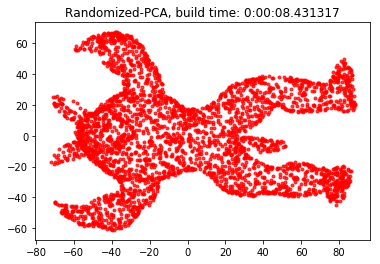

In [26]:
# Render the newly transformed rPCA armadillo!
if Y2 is not None:
    plt.scatter(Yr[:,0], Yr[:,1], c='red', marker='.', alpha=0.75)
    plt.title('Randomized-PCA, build time: ' + str(dt))
    plt.show()